# Momentum and Mean-reverting

0.06784128622401801
------results------
investment0 : 10000
(diff of compare value) : 1581.13502602657
IL(pair_value - compare_value): -1428.5593069818697
fee_return : 678.4128622401802
fee_return% : 6.78%
total_return:8.31%
annualized_std_dev14.41%
max_drawdown-4.03%
sharpe_ratio2.32
hold_strategy_value only
total_return:11.04%
annualized_std_dev24.19%
max_drawdown-6.47%
sharpe_ratio1.94


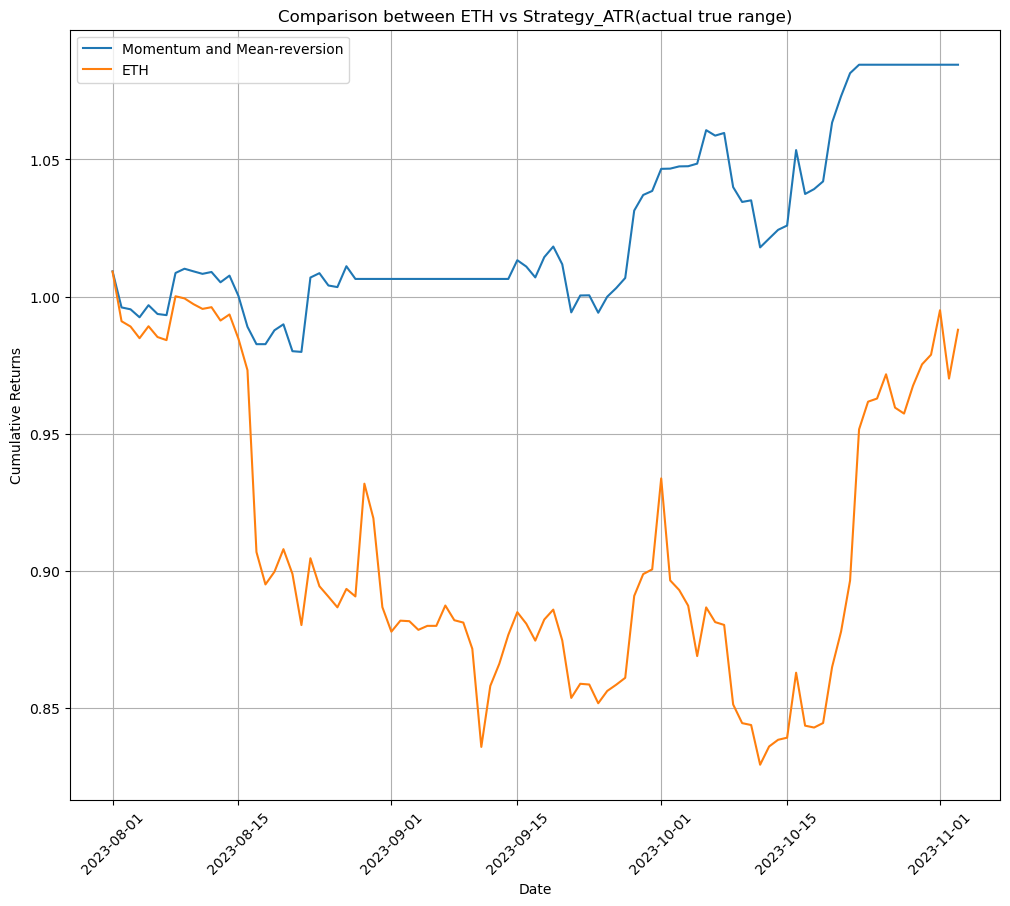

In [17]:
import json, math
import urllib.request
import pandas as pd
import os
import datetime
import time
import backtest as bt
import matplotlib.pyplot as plt
import strategy as st
def my_strategy_atr(df, start_date, end_date):
    # Strategy calculation
    period = 30  # Bollinger Bands and ATR period size
    df["SMA"] = df["close"].rolling(period).mean()
    df["std"] = df["close"].rolling(period).std()
    df["sstd"] = df["close"].rolling(period//2).std()
    

    # Calculate Average True Range (ATR) for volatility
    df['high_low'] = df['high'] - df['low']
    df['high_close'] = (df['high'] - df['close'].shift()).abs()
    df['low_close'] = (df['low'] - df['close'].shift()).abs()
    df['TR'] = df[['high_low', 'high_close', 'low_close']].max(axis=1)
    df['ATR'] = df['TR'].rolling(period).mean()

    # Adjust Bollinger Bands width based on ATR
    multiplier = df['ATR'] / df['std']
    df["upper_band"] = df["SMA"] + multiplier * df["std"]
    df["lower_band"] = df["SMA"] - multiplier * df["std"]
    df["BB%B"] = (df["close"] - df["lower_band"]) / (df["upper_band"] - df["lower_band"])
    overbought_threshold = 1
    oversold_threshold = 0
    df["position"] = None
    
    buy = {}  
    sell = [] 

    for i in range(2, len(df)):
        # Dynamically adjust stop loss and stop profit based on ATR
        stop_loss_multiplier = 3  # Can be adjusted or made dynamic
        stop_profit_multiplier = 3  # Can be adjusted or made dynamic
        stop_ls = df.loc[df.index[i-1], "SMA"] - stop_loss_multiplier * df.loc[df.index[i-1], "ATR"]
        stop_pt = df.loc[df.index[i-1], "SMA"] + stop_profit_multiplier * df.loc[df.index[i-1], "ATR"]
        if df.loc[df.index[i-2], "sstd"]<df.loc[df.index[i-2], "std"]:

            if df.loc[df.index[i-2], "BB%B"] <= oversold_threshold and df.loc[df.index[i-1], "BB%B"] > oversold_threshold:
                if df.loc[df.index[i-1], "position"] is None: 
                    df.loc[df.index[i]:,"position"] = "long"
                    buy[df.index[i]] = (stop_ls, stop_pt)

            if df.loc[df.index[i-1], "position"] == "long":
                if df.loc[df.index[i-1], "close"] <= stop_ls or df.loc[df.index[i-1], "close"] >= stop_pt:
                    df.loc[df.index[i]:, "position"] = None
                    sell.append(df.index[i])
                elif df.loc[df.index[i-2], "BB%B"] >= overbought_threshold and df.loc[df.index[i-1], "BB%B"] < overbought_threshold:
                    df.loc[df.index[i]:, "position"] = None
                    sell.append(df.index[i])
        else:
            if df.loc[df.index[i-2], "BB%B"] > oversold_threshold or df.loc[df.index[i-1], "BB%B"] <= oversold_threshold:
                if df.loc[df.index[i-1], "position"] is None: 
                    df.loc[df.index[i]:,"position"] = "long"
                    buy[df.index[i]] = (stop_ls, stop_pt)

            if df.loc[df.index[i-1], "position"] == "long":
                if df.loc[df.index[i-1], "close"] <= stop_ls or df.loc[df.index[i-1], "close"] >= stop_pt:
                    df.loc[df.index[i]:, "position"] = None
                    sell.append(df.index[i])
                elif df.loc[df.index[i-2], "BB%B"] >= overbought_threshold and df.loc[df.index[i-1], "BB%B"] < overbought_threshold:
                    df.loc[df.index[i]:, "position"] = None
                    sell.append(df.index[i])

    return df, buy, sell
def test5():

    # 設定回測參數(可更改)
    start_date = '2023-07-01 00:00:00'
    end_date = '2023-11-10 03:00:00'
    target = 10000 #初始投入金額
    investment_method = "compound_interest"
    #回測
    important_sheets, fee_return = bt.range_backtest(start_date,end_date,target,investment_method, my_strategy_atr )
    print(fee_return)
    bt.show_analysis(important_sheets,target,fee_return,investment_method)
    return important_sheets

a=test5()
plt.figure(figsize=(12, 10))
plt.title("Comparison between ETH vs Strategy_ATR(actual true range)")
plt.plot((1+a.total_value.diff()/a.total_value.shift(1)).cumprod())
plt.plot((1+a.close.diff()/a.close.shift(1)).cumprod())

# Beautifying the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['Momentum and Mean-reversion','ETH'])
plt.xticks(rotation=45)
plt.show()

0.651974702795293
------results------
investment0 : 10000
(diff of compare value) : 7827.60643429648
IL(pair_value - compare_value): -7937.8612722195885
fee_return : 6519.74702795293
fee_return% : 65.20%
total_return:64.09%
annualized_std_dev27.47%
max_drawdown-26.39%
sharpe_ratio1.11
hold_strategy_value only
total_return:187.42%
annualized_std_dev44.91%
max_drawdown-32.45%
sharpe_ratio1.79


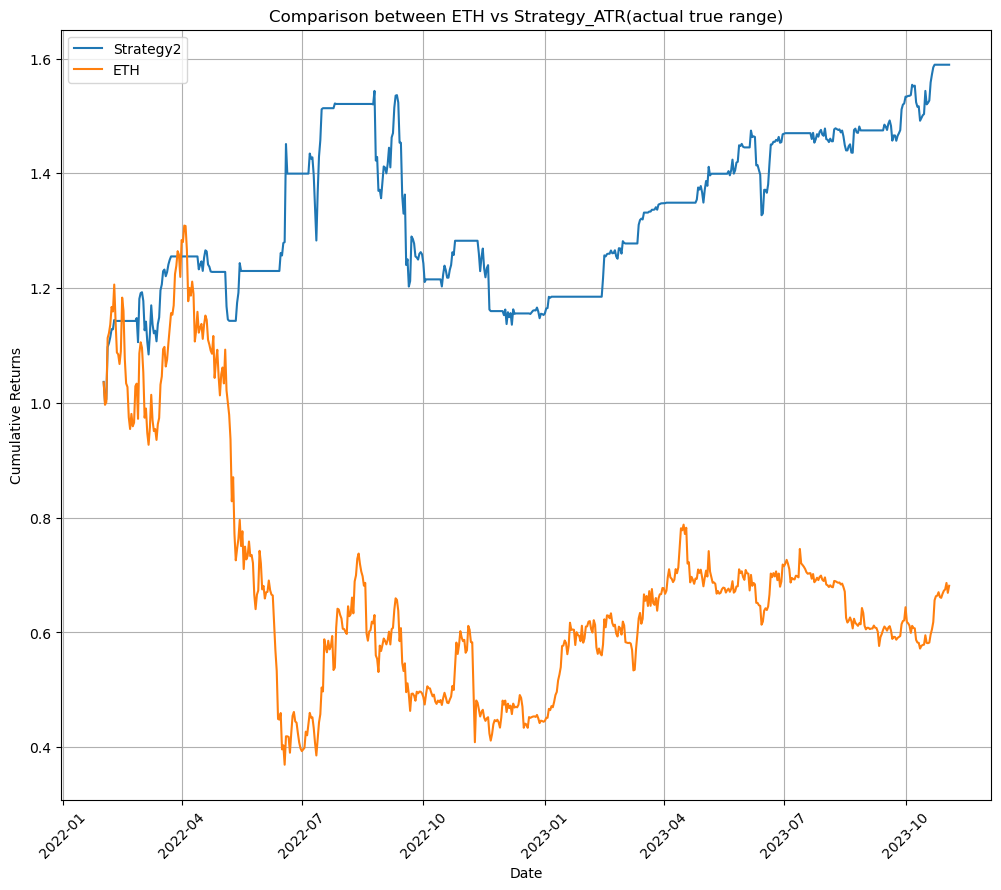

In [8]:
import json, math
import urllib.request
import pandas as pd
import os
import datetime
import time
import backtest as bt
import matplotlib.pyplot as plt
import strategy as st
def my_strategy_atr(df, start_date, end_date):
    # Strategy calculation
    period = 30  # Bollinger Bands and ATR period size
    df["SMA"] = df["close"].rolling(period).mean()
    df["std"] = df["close"].rolling(period).std()
    df["sstd"] = df["close"].rolling(period//2).std()
    

    # Calculate Average True Range (ATR) for volatility
    df['high_low'] = df['high'] - df['low']
    df['high_close'] = (df['high'] - df['close'].shift()).abs()
    df['low_close'] = (df['low'] - df['close'].shift()).abs()
    df['TR'] = df[['high_low', 'high_close', 'low_close']].max(axis=1)
    df['ATR'] = df['TR'].rolling(period).mean()

    # Adjust Bollinger Bands width based on ATR
    multiplier = df['ATR'] / df['std']
    df["upper_band"] = df["SMA"] + multiplier * df["std"]
    df["lower_band"] = df["SMA"] - multiplier * df["std"]
    df["BB%B"] = (df["close"] - df["lower_band"]) / (df["upper_band"] - df["lower_band"])
    overbought_threshold = 1
    oversold_threshold = 0
    df["position"] = None
    
    buy = {}  
    sell = [] 

    for i in range(2, len(df)):
        # Dynamically adjust stop loss and stop profit based on ATR
        stop_loss_multiplier = 3  # Can be adjusted or made dynamic
        stop_profit_multiplier = 3  # Can be adjusted or made dynamic
        stop_ls = df.loc[df.index[i-1], "SMA"] - stop_loss_multiplier * df.loc[df.index[i-1], "ATR"]
        stop_pt = df.loc[df.index[i-1], "SMA"] + stop_profit_multiplier * df.loc[df.index[i-1], "ATR"]
        if df.loc[df.index[i-2], "sstd"]<df.loc[df.index[i-2], "std"]:

            if df.loc[df.index[i-2], "BB%B"] <= oversold_threshold and df.loc[df.index[i-1], "BB%B"] > oversold_threshold:
                if df.loc[df.index[i-1], "position"] is None: 
                    df.loc[df.index[i]:,"position"] = "long"
                    buy[df.index[i]] = (stop_ls, stop_pt)

            if df.loc[df.index[i-1], "position"] == "long":
                if df.loc[df.index[i-1], "close"] <= stop_ls or df.loc[df.index[i-1], "close"] >= stop_pt:
                    df.loc[df.index[i]:, "position"] = None
                    sell.append(df.index[i])
                elif df.loc[df.index[i-2], "BB%B"] >= overbought_threshold and df.loc[df.index[i-1], "BB%B"] < overbought_threshold:
                    df.loc[df.index[i]:, "position"] = None
                    sell.append(df.index[i])
        else:
            if df.loc[df.index[i-2], "BB%B"] > oversold_threshold or df.loc[df.index[i-1], "BB%B"] <= oversold_threshold:
                if df.loc[df.index[i-1], "position"] is None: 
                    df.loc[df.index[i]:,"position"] = "long"
                    buy[df.index[i]] = (stop_ls, stop_pt)

            if df.loc[df.index[i-1], "position"] == "long":
                if df.loc[df.index[i-1], "close"] <= stop_ls or df.loc[df.index[i-1], "close"] >= stop_pt:
                    df.loc[df.index[i]:, "position"] = None
                    sell.append(df.index[i])
                elif df.loc[df.index[i-2], "BB%B"] >= overbought_threshold and df.loc[df.index[i-1], "BB%B"] < overbought_threshold:
                    df.loc[df.index[i]:, "position"] = None
                    sell.append(df.index[i])

    return df, buy, sell
def test5():

    # 設定回測參數(可更改)
    start_date = '2022-01-01 00:00:00'
    end_date = '2023-11-10 03:00:00'
    target = 10000 #初始投入金額
    investment_method = "compound_interest"
    #回測
    important_sheets, fee_return = bt.range_backtest(start_date,end_date,target,investment_method, my_strategy_atr )
    print(fee_return)
    bt.show_analysis(important_sheets,target,fee_return,investment_method)
    return important_sheets

a=test5()
plt.figure(figsize=(12, 10))
plt.title("Comparison between ETH vs Strategy_ATR(actual true range)")
plt.plot((1+a.total_value.diff()/a.total_value.shift(1)).cumprod())
plt.plot((1+a.close.diff()/a.close.shift(1)).cumprod())

# Beautifying the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['Strategy2','ETH'])
plt.xticks(rotation=45)
plt.show()

# ARIMA

In [7]:
data=pd.read_csv('graph.csv')
start_date1 = '2021-01-01 00:00:00'
end_date1 = '2023-7-31 03:00:00'
train=filtering_data(start_date1,end_date1)
train['ts']=(train['high']-train['low'])/train['open']
series=train[['ts']]

In [15]:
model = ARIMA(series, order=(1, 1, 2))

# 拟合模型
model_fit = model.fit()

# 输出模型摘要
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                  818
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2493.792
Date:                Thu, 07 Dec 2023   AIC                          -4979.585
Time:                        23:28:46   BIC                          -4960.762
Sample:                    05-05-2021   HQIC                         -4972.361
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5003      0.440     -1.137      0.256      -1.363       0.362
ma.L1         -0.3506      0.431     -0.814      0.416      -1.195       0.494
ma.L2         -0.4732      0.377     -1.256      0.2

In [14]:
forecast = model_fit.predict(start=len(series), end=len(series) + 105)

In [10]:
start_date1 = '2023-07-31 00:00:00'
end_date1 = '2023-11-2 03:00:00'
test=filtering_data(start_date1,end_date1)

In [11]:
test['forecast']=forecast
test

,Unnamed: 0,periodStartUnix,liquidity,high,low,close,feeGrowthGlobal0X128,feeGrowthGlobal1X128,open,pool.totalValueLockedUSD,pool.totalValueLockedToken1,pool.totalValueLockedToken0,pool.token0.decimals,pool.token1.decimals,forecast
date,,,,,,,,,,,,,,,
2023-07-31,610,1.690844e+09,2.884959e+19,1856.603062,1854.226278,1855.506049,2.419051e+33,1.167265e+42,1854.738559,3.875058e+08,80851.688473,2.215636e+08,6.0,18.0,NaN
2023-08-01,634,1.690931e+09,2.931531e+19,1872.446092,1849.790177,1872.391642,2.419628e+33,1.167562e+42,1849.875970,3.875058e+08,80851.688473,2.215636e+08,6.0,18.0,0.003316
2023-08-02,658,1.691017e+09,2.650466e+19,1841.769731,1837.533819,1838.815405,2.420035e+33,1.167818e+42,1841.757880,3.875058e+08,80851.688473,2.215636e+08,6.0,18.0,0.003420
2023-08-03,682,1.691104e+09,3.938600e+19,1836.166051,1835.176535,1835.225789,2.420320e+33,1.167976e+42,1835.648147,3.875058e+08,80851.688473,2.215636e+08,6.0,18.0,0.003472
2023-08-04,706,1.691190e+09,2.649563e+19,1827.335150,1824.979909,1827.327420,2.420631e+33,1.168155e+42,1826.592205,3.875058e+08,80851.688473,2.215636e+08,6.0,18.0,0.003451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-29,770,1.698620e+09,2.083110e+19,1806.583460,1794.589784,1795.219586,2.469368e+33,1.197764e+42,1806.583460,3.875058e+08,80851.688473,2.215636e+08,6.0,18.0,0.003459
2023-10-30,794,1.698707e+09,2.451878e+19,1811.039837,1807.429667,1809.635935,2.470116e+33,1.198161e+42,1809.921089,3.875058e+08,80851.688473,2.215636e+08,6.0,18.0,0.003459
2023-10-31,818,1.698793e+09,2.150972e+19,1816.530899,1809.149485,1816.150815,2.470814e+33,1.198541e+42,1810.151794,3.875058e+08,80851.688473,2.215636e+08,6.0,18.0,0.003459


0.15452369265968027
------results------
investment0 : 10000
(diff of compare value) : -121.89586251000583
IL(pair_value - compare_value): -1609.764675844297
fee_return : 1545.2369265968027
fee_return% : 15.45%
total_return:-1.86%
annualized_std_dev18.76%
max_drawdown-10.94%
sharpe_ratio-0.48
hold_strategy_value only
total_return:-3.11%
annualized_std_dev34.24%
max_drawdown-17.12%
sharpe_ratio-0.40


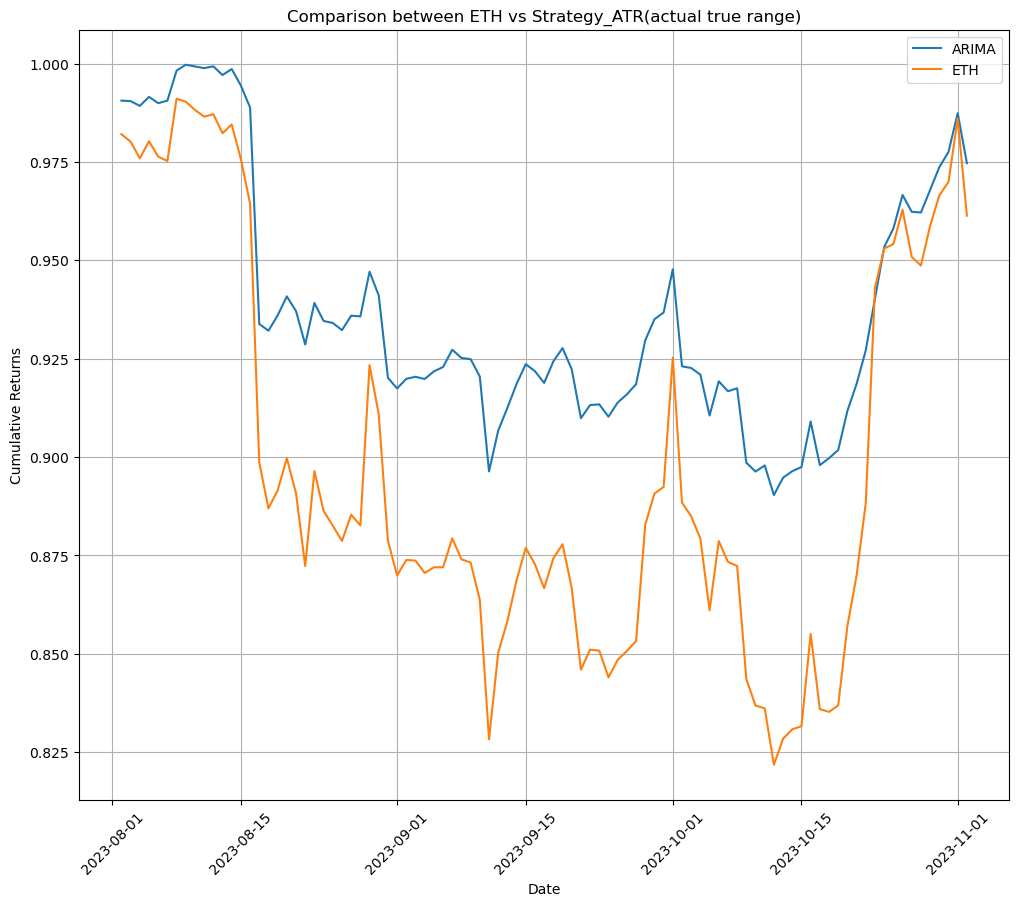

In [16]:
n=12
test['forecast_low']=test['close'].shift(1)-test['close'].shift(1)*test['forecast']*n
test['forecast_high']=test['close'].shift(1)+test['close'].shift(1)*test['forecast']*n
buy=test[['forecast_low','forecast_high']]
import json, math
import urllib.request
import pandas as pd
import os
import datetime
import time
import backtest as bt
import matplotlib.pyplot as plt
import strategy as st
def my_strategy_atr(a,b,c): 
    buy_action=buy.dropna()
    buy_action.index=pd.to_datetime(buy_action.index)
    buy_action = buy_action.T.to_dict(orient='list') 

    time_delta = pd.Timedelta(hours=23)
    sell_action =[i+time_delta for i in list(buy_action.keys())]
    
    return 0,buy_action,sell_action
def test5():

    # 設定回測參數(可更改)
    start_date = '2023-08-01 00:00:00'
    end_date = '2023-11-10 03:00:00'
    target = 10000 #初始投入金額
    investment_method = "compound_interest"
    #回測
    important_sheets, fee_return = bt.range_backtest(start_date,end_date,target,investment_method, my_strategy_atr )
    print(fee_return)
    bt.show_analysis(important_sheets,target,fee_return,investment_method)
    return important_sheets

a=test5()
plt.figure(figsize=(12, 10))
plt.title("Comparison between ETH vs Strategy_ATR(actual true range)")
plt.plot((1+a.total_value.diff()/a.total_value.shift(1)).cumprod())
plt.plot((1+a.close.diff()/a.close.shift(1)).cumprod())

# Beautifying the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['ARIMA','ETH'])
plt.xticks(rotation=45)
plt.show()